In [2]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [3]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/Pinus_sylvestris/Psylvestris_Oulu_filtered_v2.vcf', '/wrk/Gen_Tree/Pinus_sylvestris/Psylvestris_Oulu_filtered_v2.h5', fields='*', overwrite=True)

In [4]:
callset_fn = '/media/scervant/Transcend/GenTree_GM/Pinus_sylvestris/Psylvestris_GM_raw_snps.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Psylvestris_GM_raw_snps.h5" (mode r)>

In [5]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [6]:
calldata = callset['calldata']

In [7]:
calldata

<HDF5 group "/calldata" (10 members)>

In [8]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [9]:
variants = callset['variants']
variants

<HDF5 group "/variants" (29 members)>

In [10]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(3006762,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=206.5M cbytes=77.2M cratio=2.7
   values=h5py._hl.group.Group>

In [11]:
calldata = callset['calldata']
calldata

<HDF5 group "/calldata" (10 members)>

In [12]:
samples = callset['samples']
samples = list(samples)
samples

['37588_ID896_ES_PS_01_1_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37589_ID896_ES_PS_01_2_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37590_ID896_ES_PS_01_3_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37591_ID896_ES_PS_01_4_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37592_ID896_ES_PS_01_5_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37593_ID896_ES_PS_01_6_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37594_ID896_ES_PS_01_7_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37595_ID896_ES_PS_01_8_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37596_ID896_ES_PS_01_9_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37597_ID896_ES_PS_01_10_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37598_ID896_ES_PS_01_11_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37599_ID896_ES_PS_01_12_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37600_ID896_ES_PS_01_13_mapped_initial_q10_FM_clean_markdup_reduced.g',
 '37601_ID896_ES_PS_01_14_mapped_initial_q10_FM

In [13]:
list(calldata.keys())

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [14]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(3006762, 618, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=3.5G cbytes=395.6M cratio=9.0
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [15]:
#genotypes[0:1,0:10]

In [16]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

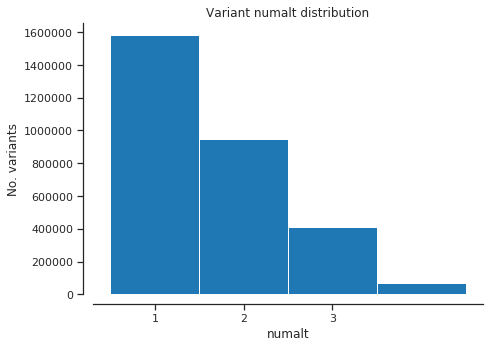

In [17]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


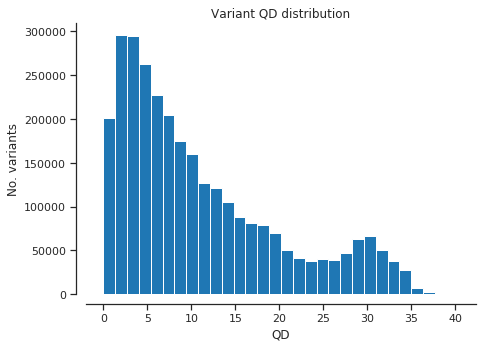

In [18]:
plot_variant_hist('QD')
plt.savefig('/wrk/Gen_Tree/Pinus_sylvestris/Psylvestris_QD')

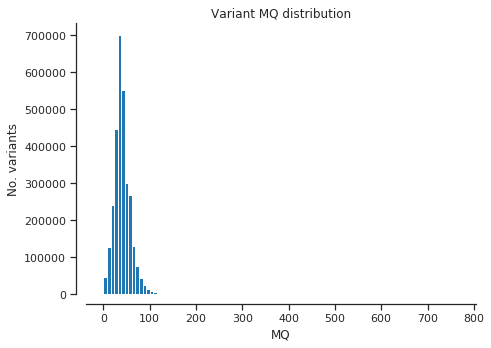

In [19]:
plot_variant_hist('MQ', bins=100)
plt.savefig('/wrk/Gen_Tree/Pinus_sylvestris/Psylvestris_MQ')

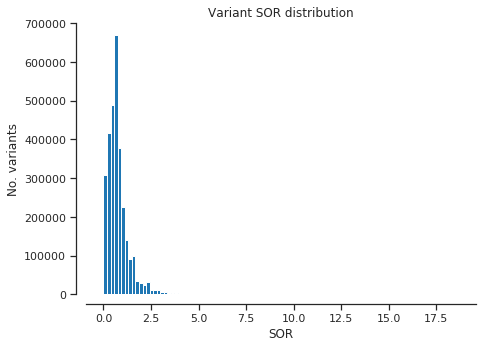

In [20]:
plot_variant_hist('SOR', bins=100)

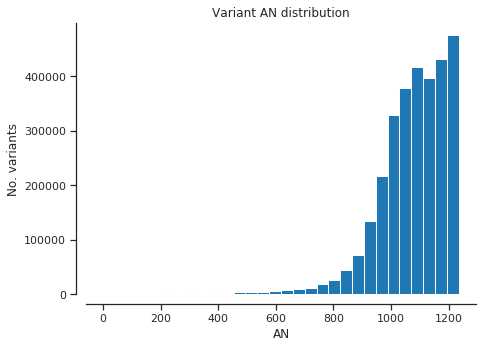

In [21]:
plot_variant_hist('AN')

In [23]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_sylvestris/raw_snps_original_samples_list.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,37588_ID896_ES_PS_01_1_mapped_initial_q10_FM_c...,ES_PS_1
1,37589_ID896_ES_PS_01_2_mapped_initial_q10_FM_c...,ES_PS_1
2,37590_ID896_ES_PS_01_3_mapped_initial_q10_FM_c...,ES_PS_1
3,37591_ID896_ES_PS_01_4_mapped_initial_q10_FM_c...,ES_PS_1
4,37592_ID896_ES_PS_01_5_mapped_initial_q10_FM_c...,ES_PS_1
...,...,...
613,38779_ID896_DE_PS_12_9_mapped_initial_q10_FM_c...,DE_PS_12
614,38780_ID896_DE_PS_12_10_mapped_initial_q10_FM_...,DE_PS_12
615,38781_ID896_DE_PS_12_11_mapped_initial_q10_FM_...,DE_PS_12
616,38782_ID896_DE_PS_12_12_mapped_initial_q10_FM_...,DE_PS_12


In [24]:
samples.Population.value_counts()

FL          50
ES_PS_1     25
ES_PS_2     25
LI_PS_21    25
LI_PS_20    25
IT_PS_8     25
FI_PS_19    25
NO_PS_15    25
GB_PS_13    25
DE_PS_12    25
FR_PS_4     25
NO_PS_16    25
CH_PS_5     25
SE_PS_17    25
GR_PS_9     25
GB_PS_14    25
FR_PS_3     25
GR_PS_10    25
IT_PS_7     25
CH_PS_6     25
FI_PS_18    25
DE_PS_11    25
RY          20
LF          20
GRS          3
Name: Population, dtype: int64

In [38]:
#sample_selection = samples.Population.isin({'SE-BP-18', 'FR-BP-04', 'IT-BP-07', 'GB-BP-14', 'FI-BP-19', 'CH-BP-06', 'ES-BP-02', 'SE-BP-17', 'NO-BP-15', 'FR-BP-03', 'DE-BP-10', 'FI-BP-20', 'LT-BP-11', 'FR-BP-21', 'NO-BP-16', 'IT-BP-08', 'CH-BP-05', 'LT-BP-12', 'DE-BP-09', 'GB-BP-13'}).values
#sample_selection[:5]

In [25]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(3006762, 5) dtype=int32 chunks=(46981, 5)
   nbytes=57.3M cbytes=14.7M cratio=3.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [61]:
populations = samples.Population.unique()

In [26]:
n_variants = len(genotypes)
n_variants

3006762

In [27]:
pc_missing = genotypes.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes.count_het(axis=0)[:] * 100 / n_variants

In [62]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['ES_PS_1', 'ES_PS_2', 'FR_PS_3', 'FR_PS_4', 'DE_PS_12', 'GB_PS_13',
       'GB_PS_14', 'NO_PS_15', 'NO_PS_16', 'CH_PS_5', 'CH_PS_6',
       'IT_PS_7', 'IT_PS_8', 'SE_PS_17', 'FI_PS_18', 'FI_PS_19',
       'LI_PS_20', 'LI_PS_21', 'GRS', 'FL', 'RY', 'LF', 'GR_PS_9',
       'GR_PS_10', 'DE_PS_11'], dtype=object)

In [63]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 40)
    pop2color = {'ES_PS_1': palette[27], 
                 'ES_PS_2' : palette[1], 
                 'FR_PS_3': palette[14], 
                 'FR_PS_4': palette[15], 
                 'DE_PS_12': palette[4],
                 'GB_PS_13': palette[31], 
                 'GB_PS_14': palette[30], 
                 'NO_PS_15': palette[7],
                 'NO_PS_16': palette[9],
                 'CH_PS_5': palette[37],
                 'CH_PS_6': palette[38], 
                 'IT_PS_7': palette[12],
                 'IT_PS_8': palette[13],
                 'SE_PS_17': palette[2],
                 'FI_PS_18': palette[16],
                 'FI_PS_19': palette[17],
                 'LI_PS_20': palette[29],
                 'LI_PS_21': palette[18],
                 'GRS': palette[19],
                 'FL': palette[23],
                 'RY': palette[35],
                 'LF': palette[10],
                 'GR_PS_9': palette[33],
                 'GR_PS_10': palette[0],
                 'DE_PS_11': palette[20]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[27]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[31]),
               mpl.patches.Patch(color=palette[30]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[37]),
               mpl.patches.Patch(color=palette[38]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[29]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[35]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[33]),
               mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[20])]
    ax.legend(handles=handles, labels=['ES_PS_1', 'ES_PS_2', 'FR_PS_3', 'FR_PS_4', 'DE_PS_12', 'GB_PS_13',
       'GB_PS_14', 'NO_PS_15', 'NO_PS_16', 'CH_PS_5', 'CH_PS_6',
       'IT_PS_7', 'IT_PS_8', 'SE_PS_17', 'FI_PS_18', 'FI_PS_19',
       'LI_PS_20', 'LI_PS_21', 'GRS', 'FL', 'RY', 'LF', 'GR_PS_9',
       'GR_PS_10', 'DE_PS_11'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

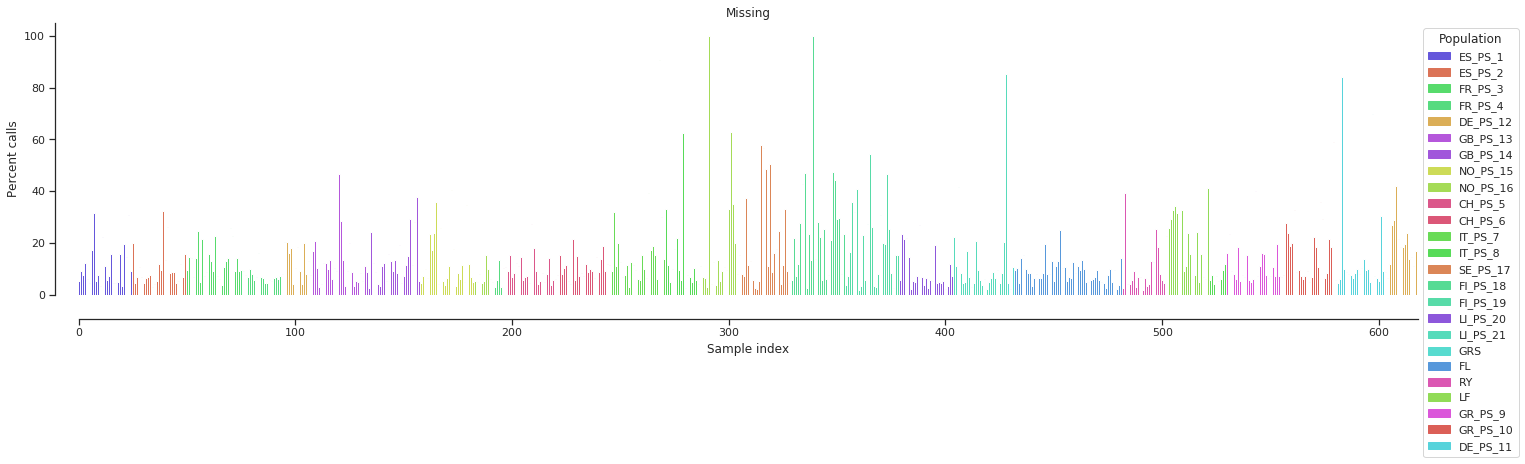

In [64]:
plot_genotype_frequency(pc_missing, 'Missing')

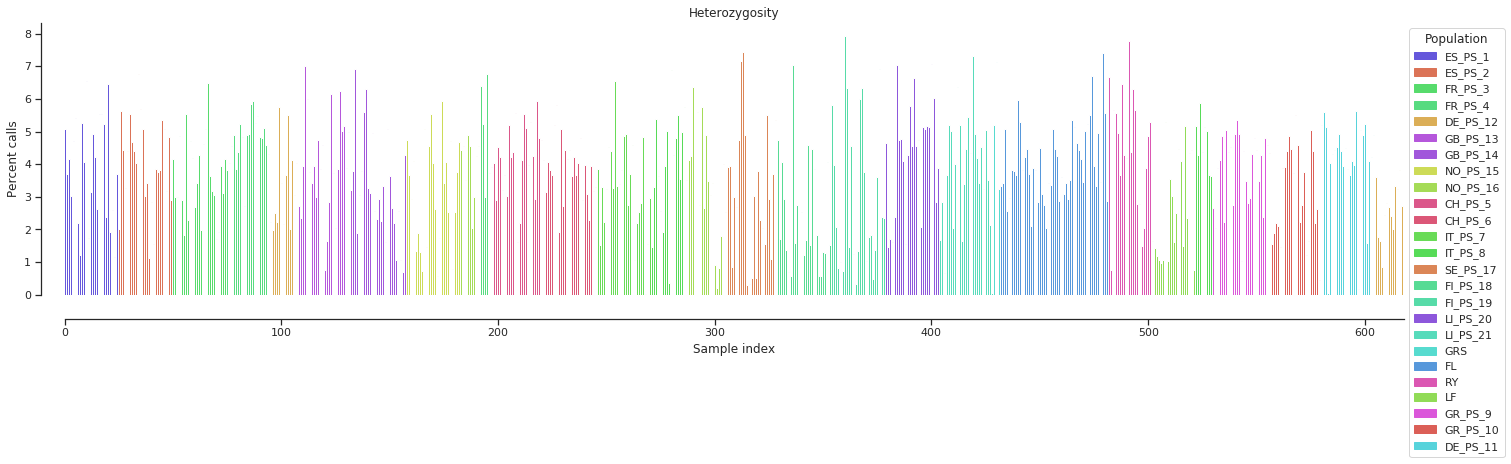

In [65]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [34]:
samples

,ID,Population
0,37588_ID896_ES_PS_01_1_mapped_initial_q10_FM_c...,ES_PS_1
1,37589_ID896_ES_PS_01_2_mapped_initial_q10_FM_c...,ES_PS_1
2,37590_ID896_ES_PS_01_3_mapped_initial_q10_FM_c...,ES_PS_1
3,37591_ID896_ES_PS_01_4_mapped_initial_q10_FM_c...,ES_PS_1
4,37592_ID896_ES_PS_01_5_mapped_initial_q10_FM_c...,ES_PS_1
...,...,...
613,38779_ID896_DE_PS_12_9_mapped_initial_q10_FM_c...,DE_PS_12
614,38780_ID896_DE_PS_12_10_mapped_initial_q10_FM_...,DE_PS_12
615,38781_ID896_DE_PS_12_11_mapped_initial_q10_FM_...,DE_PS_12
616,38782_ID896_DE_PS_12_12_mapped_initial_q10_FM_...,DE_PS_12


In [56]:
palette = sns.color_palette("hls", 39)
pop_colours = {'ES_PS_1': palette[27], 
                 'ES_PS_2' : palette[1], 
                 'FR_PS_3': palette[14], 
                 'FR_PS_4': palette[15], 
                 'DE_PS_12': palette[4],
                 'GB_PS_13': palette[31], 
                 'GB_PS_14': palette[30], 
                 'NO_PS_15': palette[7],
                 'NO_PS_16': palette[9],
                 'CH_PS_5': palette[37],
                 'CH_PS_6': palette[38], 
                 'IT_PS_7': palette[12],
                 'IT_PS_8': palette[13],
                 'SE_PS_17': palette[2],
                 'FI_PS_18': palette[16],
                 'FI_PS_19': palette[17],
                 'LI_PS_20': palette[29],
                 'LI_PS_21': palette[18],
                 'GRS': palette[19],
                 'FL': palette[23],
                 'RY': palette[35],
                 'LF': palette[10],
                 'GR_PS_9': palette[33],
                 'GR_PS_10': palette[0],
                 'DE_PS_11': palette[20]}

In [57]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [58]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes.compress(flt, axis=0)
gn = gf.to_n_alt()

In [59]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

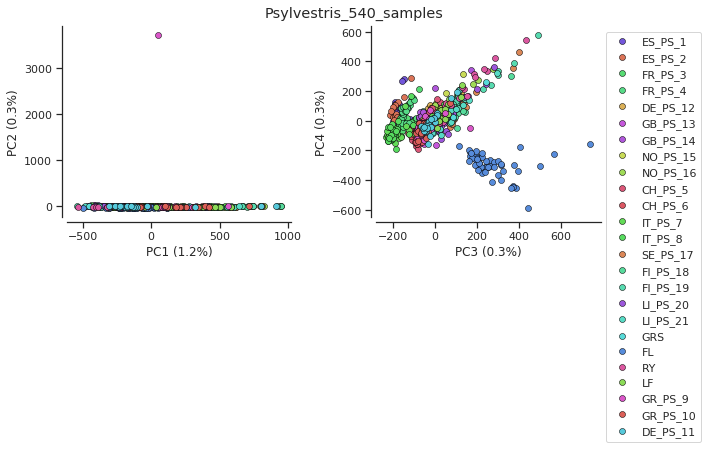

In [66]:
fig_pca(coords1, model1, 'Psylvestris_540_samples')
plt.savefig('/wrk/Gen_Tree/Pinus_sylvestris/Psylvestris_540_samples')

In [67]:
weirdos = coords1[:,1]>2000
samples[weirdos]

,ID,Population
532,38698_ID896_GR_PS_09_3_mapped_initial_q10_FM_c...,GR_PS_9
